In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data and Explore

In [192]:
df = pd.read_csv('/content/drive/My Drive/super AI Engineer/week5/Online Retail.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [193]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  530691 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [195]:
# check missing data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [196]:
# check dubplicate
df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19050
UnitPrice       1292
CustomerID      4339
Country           38
dtype: int64

In [197]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [198]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [199]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
# df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))
df['Month'] = df['InvoiceDate'].dt.month
df.sample(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
61289,541497,90214H,"LETTER ""H"" BLING KEY RING",2,2011-01-18 15:19:00,0.83,NaN,United Kingdom,1.66,2011-01-18,1
308280,564666,22111,SCOTTIE DOG HOT WATER BOTTLE,3,2011-08-26 14:51:00,4.95,12492.0,Germany,14.85,2011-08-26,8
206522,555340,21868,POTTING SHED TEA MUG,6,2011-06-02 11:33:00,1.25,13334.0,United Kingdom,7.50,2011-06-02,6
189987,553549,22565,FELTCRAFT HAIRBANDS PINK AND WHITE,6,2011-05-17 16:09:00,1.63,NaN,United Kingdom,9.78,2011-05-17,5
63032,541595,85170D,SET/6 PINK BIRD T-LIGHT CANDLES,1,2011-01-19 16:08:00,2.10,14606.0,United Kingdom,2.10,2011-01-19,1


# Monthly sale Analysis

In [200]:
df.sample(n=5, random_state=2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
480778,578065,22430,ENAMEL WATERING CAN CREAM,1,2011-11-22 15:41:00,9.96,NaN,United Kingdom,9.96,2011-11-22,11
156395,550361,23233,WRAP POPPIES DESIGN,25,2011-04-18 11:10:00,0.42,13082.0,United Kingdom,10.50,2011-04-18,4
395273,571654,22457,NATURAL SLATE HEART CHALKBOARD,1,2011-10-18 12:17:00,2.95,18118.0,United Kingdom,2.95,2011-10-18,10
402911,572225,22141,CHRISTMAS CRAFT TREE TOP ANGEL,12,2011-10-21 13:50:00,2.10,13157.0,United Kingdom,25.20,2011-10-21,10
447682,575736,23354,6 GIFT TAGS 50'S CHRISTMAS,12,2011-11-11 08:47:00,0.83,12697.0,Sweden,9.96,2011-11-11,11


In [201]:
Month_sales = df.groupby('Month').agg({'Amount' : ['sum','count'], 
                                       'CustomerID' :  'nunique',
                                       'InvoiceNo' : 'nunique'
                                       })
Month_sales.columns = ['รายรับรวม', 'จำนวนสินค้าที่ขายได้', 'จำนวนลูกค้าที่รู้จักมาซื้อของ', 'จำนวนการซื้อ']
Month_sales['เงิน/ซื้อ1ครั้ง'] = Month_sales['รายรับรวม'] / Month_sales['จำนวนการซื้อ']
Month_sales.reset_index(inplace=True)
Month_sales

,Month,รายรับรวม,จำนวนสินค้าที่ขายได้,จำนวนลูกค้าที่รู้จักมาซื้อของ,จำนวนการซื้อ,เงิน/ซื้อ1ครั้ง
0,1,691364.560,34350,741,1120,617.289786
1,2,523631.890,27184,758,1126,465.037202
2,3,717639.360,35915,974,1531,468.738968
3,4,537808.621,29171,856,1318,408.049030
4,5,770536.020,36292,1056,1731,445.139237
5,6,761739.900,36056,991,1576,483.337500
6,7,719221.191,38716,949,1541,466.723680
7,8,759138.380,34564,935,1407,539.543980
8,9,1058590.172,49323,1266,1897,558.033828
9,10,1154979.300,59396,1364,2129,542.498497


Content : ข้อมูลที่ show ควรมีอะไรบ้าง
*   รายรับรวม
*   จำนวนการซื้อ

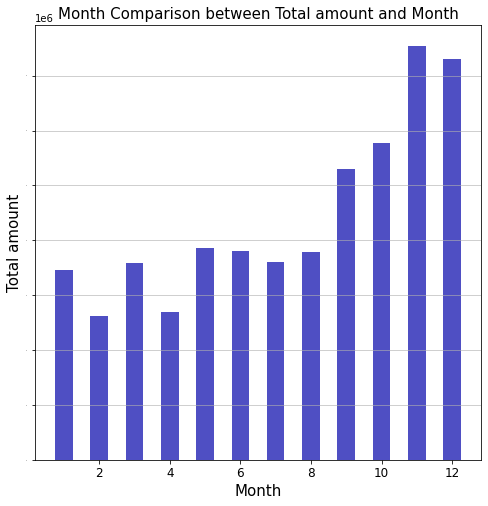

In [202]:
# %matplotlib inline
plt.figure(figsize=(8,8))
plt.bar(Month_sales['Month'], Month_sales["รายรับรวม"], width=0.5, color='#0504aa', alpha=0.7)
# plt.plot(Month_sales['Month'], Month_sales['รายรับรวม'], 'red')
# plt.xlim(min(Month_sales['Month']), max(Month_sales['Month']))
# sns.barplot(x='Month', y='รายรับรวม', data=Month_sales, palette="muted")
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total amount',fontsize=15)
plt.title('Month Comparison between Total amount and Month',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

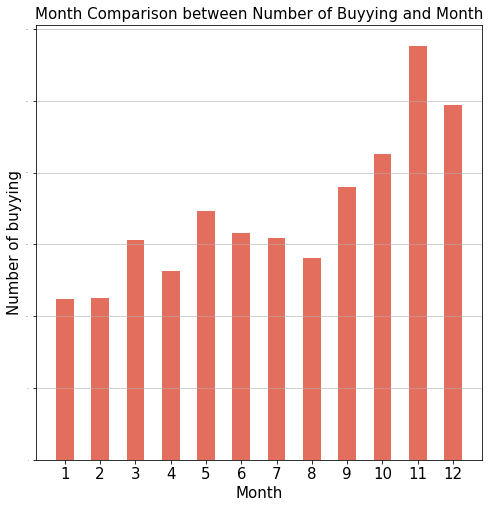

In [203]:
plt.figure(figsize=(8,8))
plt.bar(Month_sales['Month'], Month_sales['จำนวนการซื้อ'], width=0.5, color = '#DC4A36', alpha=0.8)
# sns.barplot(x='Month', y='จำนวนการซื้อ', data=Month_sales)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of buyying', fontsize=15)
plt.title('Month Comparison between Number of Buyying and Month', fontsize=15)
plt.xticks(Month_sales['Month'], fontsize=15)
plt.yticks(fontsize=0)
plt.grid(axis='y', alpha=0.7)
plt.show()

# Time analysis

In [204]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12


In [205]:
df['Hours'] = df['InvoiceDate'].dt.hour
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month,Hours
162336,550834,21980,PACK OF 12 RED RETROSPOT TISSUES,12,2011-04-21 10:51:00,0.29,14730.0,United Kingdom,3.48,2011-04-21,4,10
405529,572443,15056BL,EDWARDIAN PARASOL BLACK,60,2011-10-24 12:10:00,4.95,14145.0,United Kingdom,297.00,2011-10-24,10,12
526083,581219,22375,AIRLINE BAG VINTAGE JET SET BROWN,1,2011-12-08 09:28:00,8.29,NaN,United Kingdom,8.29,2011-12-08,12,9
126364,547372,21535,RED RETROSPOT SMALL MILK JUG,1,2011-03-22 13:46:00,2.55,16374.0,United Kingdom,2.55,2011-03-22,3,13
282977,562219,22652,TRAVEL SEWING KIT,10,2011-08-03 14:14:00,1.65,15089.0,United Kingdom,16.50,2011-08-03,8,14


In [206]:
Time_sales = df.groupby('Hours').agg({'Amount' : 'sum'})
Time_sales.reset_index(inplace=True)
Time_sales

,Hours,Amount
0,6,4.250
1,7,31059.210
2,8,283868.520
3,9,990267.821
4,10,1446742.701
5,11,1239954.440
6,12,1444245.880
7,13,1265736.300
8,14,1181812.371
9,15,1352972.180


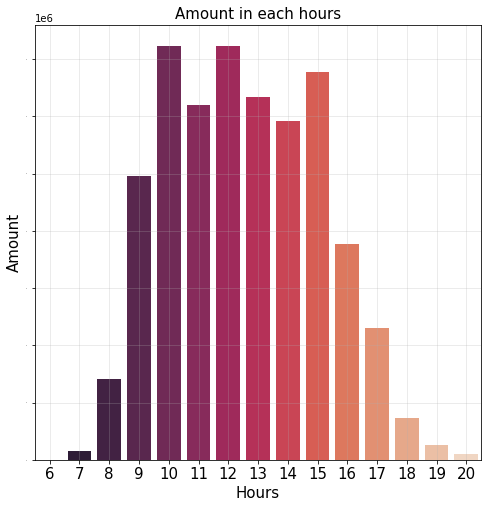

In [207]:
plt.figure(figsize=(8,8))
# plt.scatter(Time_sales['Hours'], Time_sales['Amount'], color='#BC3912')
# plt.plot(Time_sales['Hours'], Time_sales['Amount'])
# plt.bar(Time_sales['Hours'], Time_sales['Amount'], color='#3BD93F', alpha=0.7)
sns.barplot(x='Hours', y='Amount', data=Time_sales, palette="rocket")
plt.title('Amount in each hours', fontsize=15)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=0)
plt.grid(axis='both', alpha=0.3)
plt.show()

# Country comparison

In [208]:
Country_sales = df.groupby(by=['Country'])[['Amount']].sum()\
                        .reset_index()\
                        .sort_values(by='Amount', ascending=False)
Country_sales.head()

,Country,Amount
36,United Kingdom,9.025222e+06
24,Netherlands,2.854463e+05
10,EIRE,2.834540e+05
14,Germany,2.288671e+05
13,France,2.097151e+05


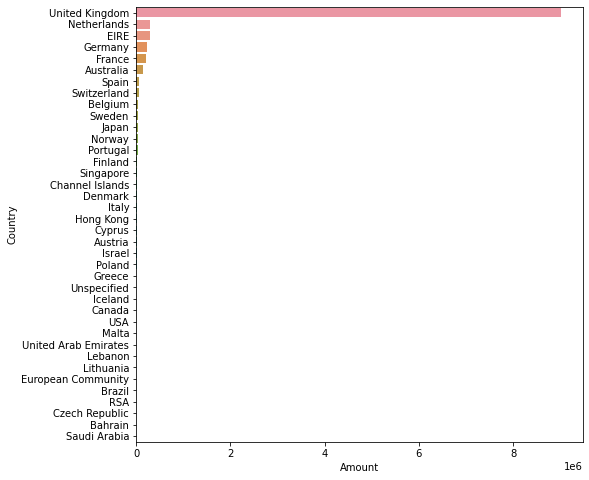

In [209]:
plt.figure(figsize=(8,8))
sns.barplot(y = 'Country', x='Amount', data = Country_sales)
plt.show()

In [210]:
Country_sales_no_uk = Country_sales[Country_sales['Country']!= 'United Kingdom']

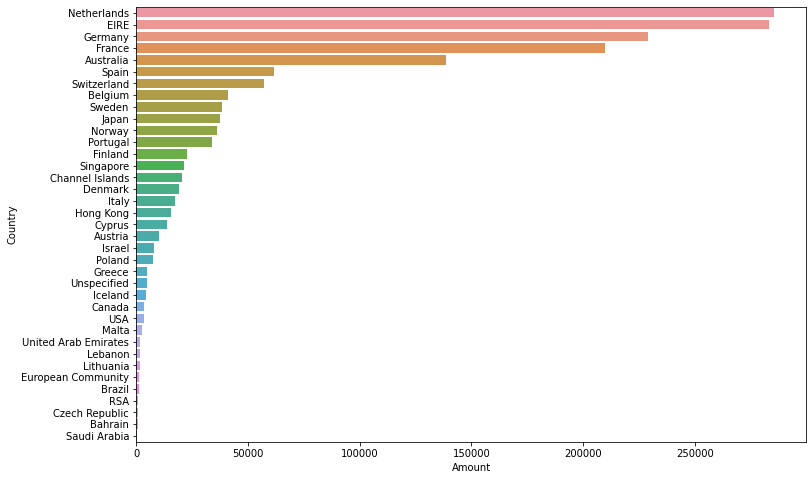

In [211]:
plt.figure(figsize=(12,8))
sns.barplot(y = 'Country', x='Amount', data = Country_sales_no_uk)
plt.show()

# Good customer

In [212]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month,Hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,8


In [213]:
Customer = df.groupby('CustomerID').agg({'Amount' : ['sum','count'], 
                                       'InvoiceNo' : 'nunique'
                                       })
Customer.columns = ['ซื้อรวม', 'จำนวนสินค้าที่ซื้อ', 'จำนวนการมาซื้อ']
Customer['เงิน/ซื้อ1ครั้ง'] = Customer['ซื้อรวม'] / Customer['จำนวนการมาซื้อ']
Customer.reset_index(inplace=True)
Customer

,CustomerID,ซื้อรวม,จำนวนสินค้าที่ซื้อ,จำนวนการมาซื้อ,เงิน/ซื้อ1ครั้ง
0,12346.0,77183.60,1,1,77183.600000
1,12347.0,4310.00,182,7,615.714286
2,12348.0,1797.24,31,4,449.310000
3,12349.0,1757.55,73,1,1757.550000
4,12350.0,334.40,17,1,334.400000
...,...,...,...,...,...
4334,18280.0,180.60,10,1,180.600000
4335,18281.0,80.82,7,1,80.820000
4336,18282.0,178.05,12,2,89.025000
4337,18283.0,2094.88,756,16,130.930000


[]

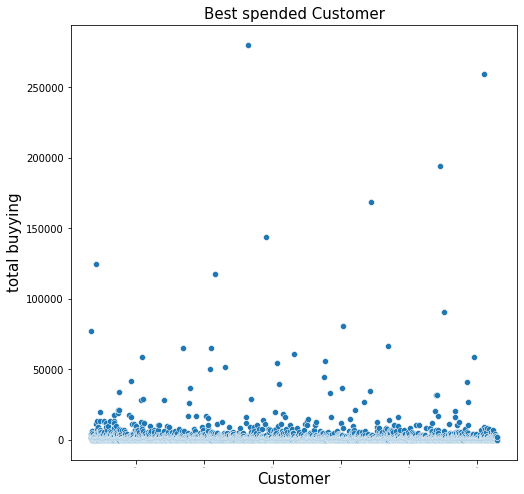

In [214]:
plt.figure(figsize=(8,8))
sns.scatterplot(y='ซื้อรวม', x='CustomerID', data=Customer)
plt.xlabel('Customer', fontsize=15)
plt.ylabel('total buyying', fontsize=15)
plt.title('Best spended Customer', fontsize=15)
plt.xticks(fontsize=0)
plt.plot()

[]

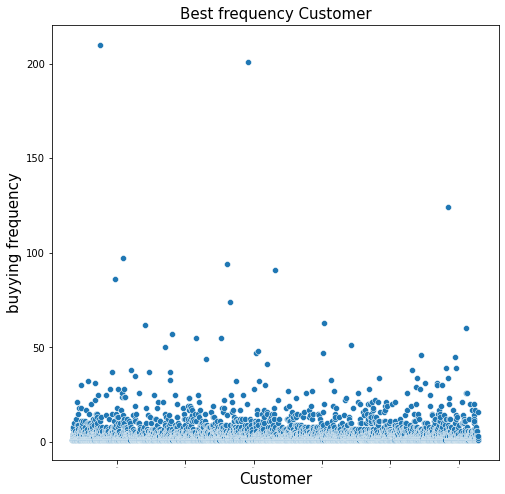

In [215]:
plt.figure(figsize=(8,8))
sns.scatterplot(y='จำนวนการมาซื้อ', x='CustomerID', data=Customer)
plt.xlabel('Customer', fontsize=15)
plt.ylabel('buyying frequency', fontsize=15)
plt.title('Best frequency Customer', fontsize=15)
plt.xticks(fontsize=0)
plt.plot()

# Best product

In [223]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month,Hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,8


In [254]:
Best_Product = df.groupby('Description')[['Amount', 'Quantity']].sum()
Best_Product.columns = ['รายรับรวม', 'จำนวนสินค้าที่ขายได้']
Best_Product.reset_index(inplace=True)
Best_Product = Best_Product.sort_values(by='รายรับรวม', ascending=False)[0:10]
Best_Product

,Description,รายรับรวม,จำนวนสินค้าที่ขายได้
1072,DOTCOM POSTAGE,206248.77,708
2867,REGENCY CAKESTAND 3 TIER,174484.74,13890
2401,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
3860,WHITE HANGING HEART T-LIGHT HOLDER,106292.77,37895
2427,PARTY BUNTING,99504.33,18299
1827,JUMBO BAG RED RETROSPOT,94340.05,48478
2065,MEDIUM CERAMIC TOP STORAGE JAR,81700.92,78033
2205,Manual,78112.82,7231
2706,POSTAGE,78101.88,3150
2755,RABBIT NIGHT LIGHT,66964.99,30788


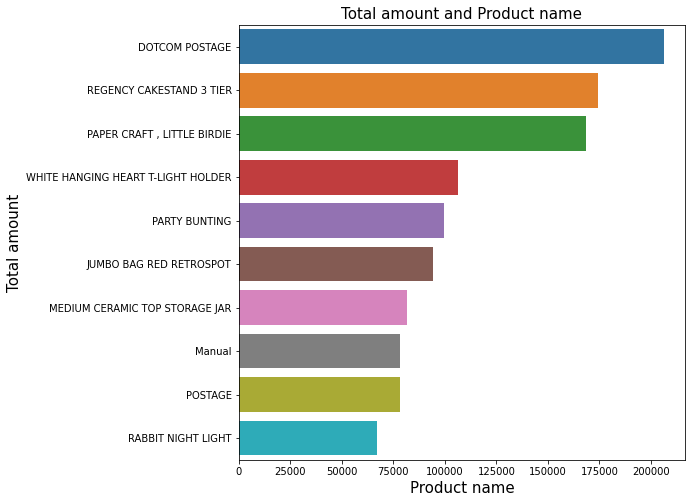

In [255]:
plt.figure(figsize=(8,8))
sns.barplot(x='รายรับรวม', y='Description', data=Best_Product)
plt.xlabel('Product name', fontsize=15)
plt.ylabel('Total amount', fontsize=15)
plt.title('Total amount and Product name', fontsize=15)
plt.show()

# Dashboard

Text(0.5, 1.0, 'Total amount and Product name')

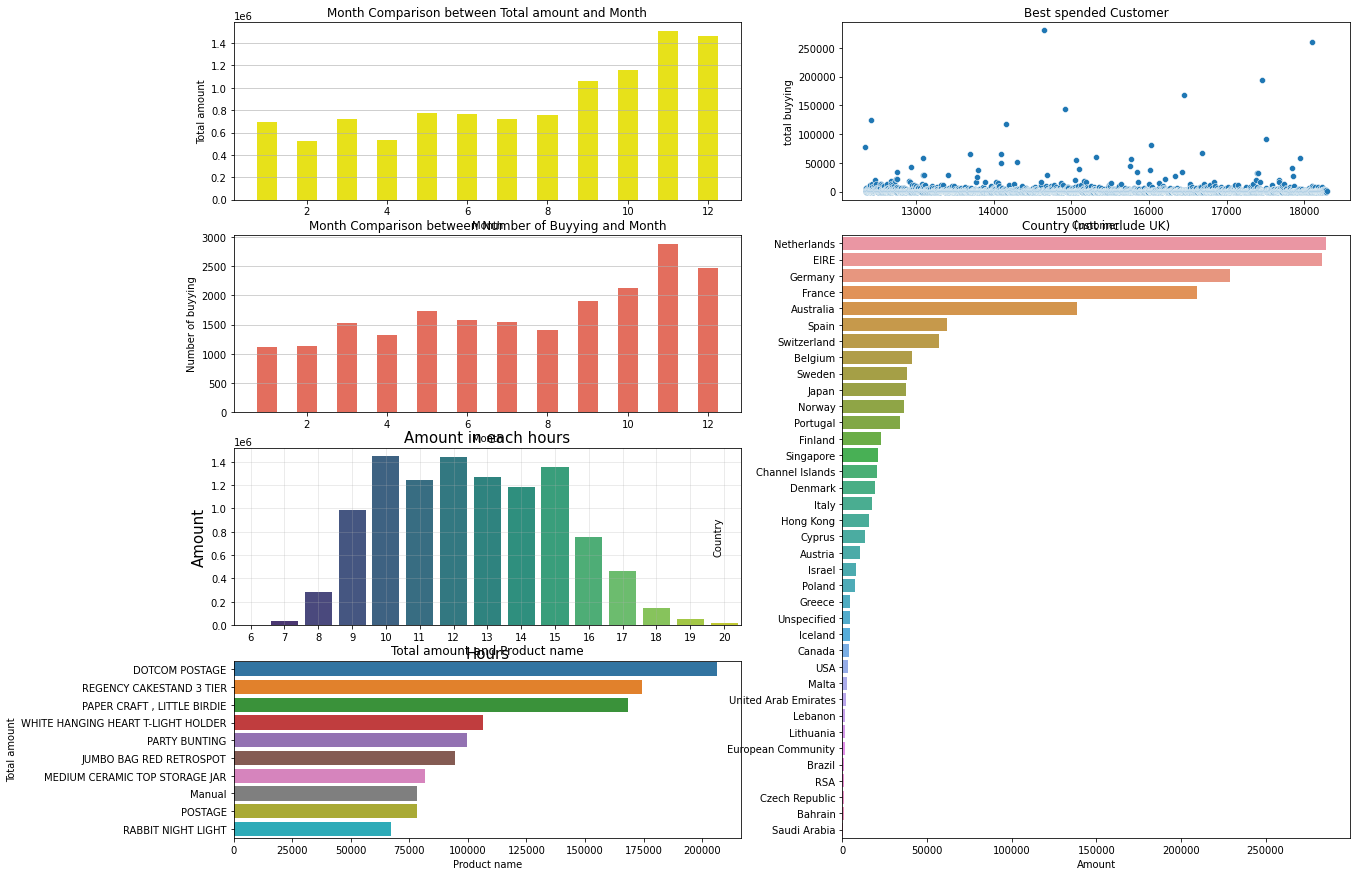

In [312]:
fig, axes = plt.subplots(4,2,figsize=(20,15))
gs = axes[1, 1].get_gridspec()
for a in axes[1:, -1]:
    a.remove()
axbig = fig.add_subplot(gs[1:, -1])

# กราฟ 1
axes[0,0].bar(Month_sales['Month'], Month_sales["รายรับรวม"], width=0.5, color='#E7E11A', alpha=1)
axes[0,0].set_xlabel('Month',fontsize=10)
axes[0,0].set_ylabel('Total amount',fontsize=10)
axes[0,0].set_title('Month Comparison between Total amount and Month',fontsize=12)
axes[0,0].grid(axis='y', alpha=0.75)

# กราฟ 2
axes[1,0].bar(Month_sales['Month'], Month_sales['จำนวนการซื้อ'], width=0.5, color = '#DC4A36', alpha=0.8)
# sns.barplot(x='Month', y='จำนวนการซื้อ', data=Month_sales)
axes[1,0].set_xlabel('Month', fontsize=10)
axes[1,0].set_ylabel('Number of buyying', fontsize=10)
axes[1,0].set_title('Month Comparison between Number of Buyying and Month', fontsize=12)
axes[1,0].grid(axis='y', alpha=0.7)

# กราฟ 3
sns.barplot(x='Hours', y='Amount', data=Time_sales, palette="viridis", ax=axes[2,0])
axes[2,0].set_title('Amount in each hours', fontsize=15)
axes[2,0].set_xlabel('Hours', fontsize=15)
axes[2,0].set_ylabel('Amount', fontsize=15)
axes[2,0].grid(axis='both', alpha=0.3)

# กราฟ 4
sns.barplot(y = 'Country', x='Amount', data = Country_sales_no_uk, ax=axbig)
axbig.set_title('Country (not include UK)', fontsize=12)

# กราฟ 5
sns.scatterplot(y='ซื้อรวม', x='CustomerID', data=Customer, ax=axes[0,1])
axes[0,1].set_xlabel('Customer', fontsize=10)
axes[0,1].set_ylabel('total buyying', fontsize=10)
axes[0,1].set_title('Best spended Customer', fontsize=12)

# กราฟ 6 
sns.barplot(x='รายรับรวม', y='Description', data=Best_Product, ax=axes[3,0])
axes[3,0].set_xlabel('Product name', fontsize=10)
axes[3,0].set_ylabel('Total amount', fontsize=10)
axes[3,0].set_title('Total amount and Product name', fontsize=12)